In [1]:
!pip install catboost
!pip install xgboost
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.8 MB/s eta 0:00:00


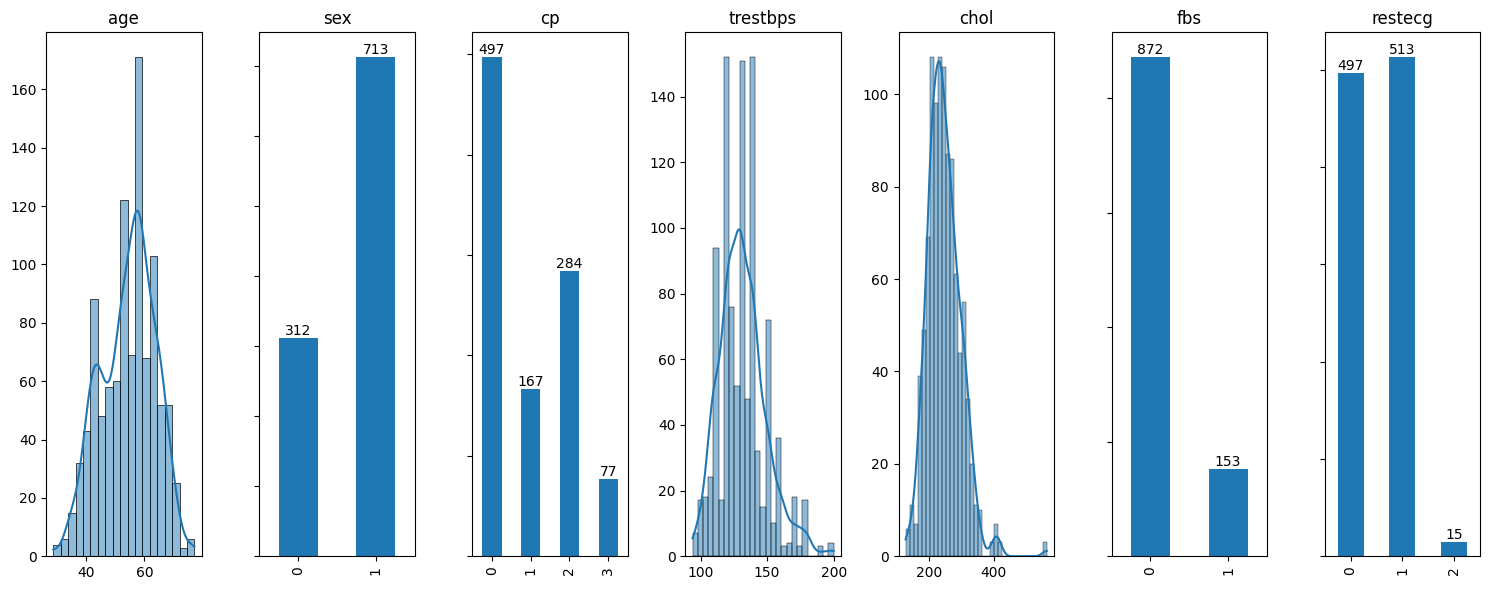

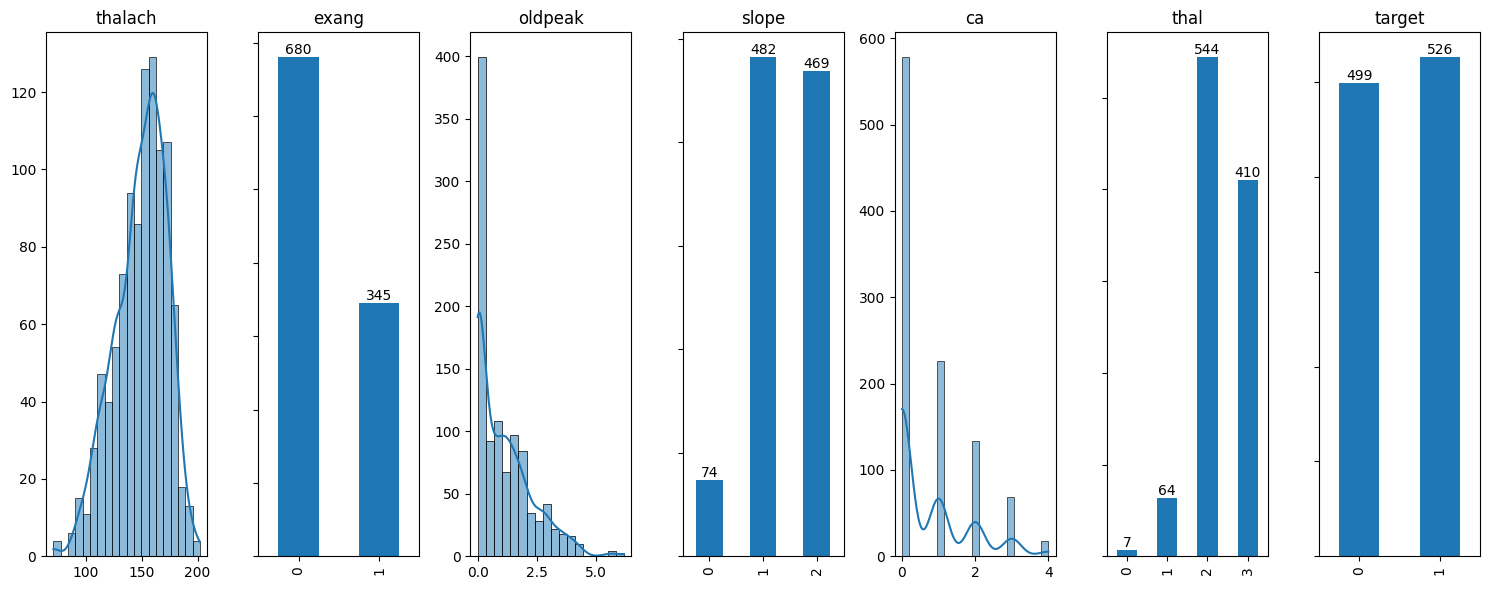

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

def bar_labels(axes, rotation=0, location="edge"):
    for container in axes.containers:
        axes.bar_label(container, label_type=location, rotation=rotation)
    axes.set_xlabel("")
    axes.set_ylabel("")
    axes.set_yticklabels(())

def training_classification():
    rfc = RandomForestClassifier()
    abc = AdaBoostClassifier()
    gbc = GradientBoostingClassifier()
    etc = ExtraTreesClassifier()
    lgr = LogisticRegression()
    svc = SVC()
    mnb = MultinomialNB()
    xgb = XGBClassifier()
    lgb = LGBMClassifier(verbose=-100)
    cat = CatBoostClassifier(verbose=False)

    models = [rfc, abc, gbc, etc, lgr,
             svc, mnb, xgb, lgb, cat]

    names = ["Random Forest", "Ada Boost", "Gradient Boosting", "Extra Trees", "Logistic Regression",
            "SVC", "Naive Bayes", "XGBoost", "LightGBM", "Cat Boost"]

    scores = []
    cms = dict()
    reports = dict()

    for i, j in enumerate(names):
        models[i].fit(x_train, y_train)
        pred = models[i].predict(x_test)
        scores += [accuracy_score(pred, y_test)]
        cms[j] = confusion_matrix(pred, y_test)
        reports[j] = classification_report(pred, y_test)

    dt = pd.DataFrame({"scores": scores}, index=names)
    dt = dt.sort_values("scores", ascending=False)

    dt["scores"] = dt["scores"]*100
    dt["scores"] = round(dt["scores"], 2)

    fig, axes = plt.subplots(figsize=(15, 6))

    dt["scores"].plot(kind="bar", ax=axes)
    bar_labels(axes)

    index = 0

    for _ in range(2):
        fig, axes = plt.subplots(ncols=5, figsize=(15, 6))
        for i in range(5):
            sns.heatmap(cms[dt.index[index]], annot=True, ax=axes[i])
            axes[i].set_title("{}: {}%".format(dt.index[index], dt.iloc[index, 0]))
            index += 1
        plt.tight_layout()
        plt.show()

    for i in dt.index:
        print("*"*30)
        print("\n")
        print(i)
        print("\n")
        print(reports[i])

df = pd.read_csv("/content/cardiac arrest dataset.csv")

cats = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal", "target"]
nums = [i for i in df.columns if i not in cats]

index = 0

for _ in range(2):
    fig, axes = plt.subplots(ncols=7, figsize=(15, 6))
    for i in range(7):
        if df.columns[index] in cats:
            df[df.columns[index]].value_counts().sort_index().plot(kind="bar", ax=axes[i])
            bar_labels(axes[i])
            axes[i].set_title(df.columns[index].replace('_', ' '))
        else:
            sns.histplot(df, x=df.columns[index], kde=True, ax=axes[i])
            axes[i].set_xlabel("")
            axes[i].set_ylabel("")
            axes[i].set_title(df.columns[index].replace('_', ' '))
        index += 1
    plt.tight_layout()
    plt.show()

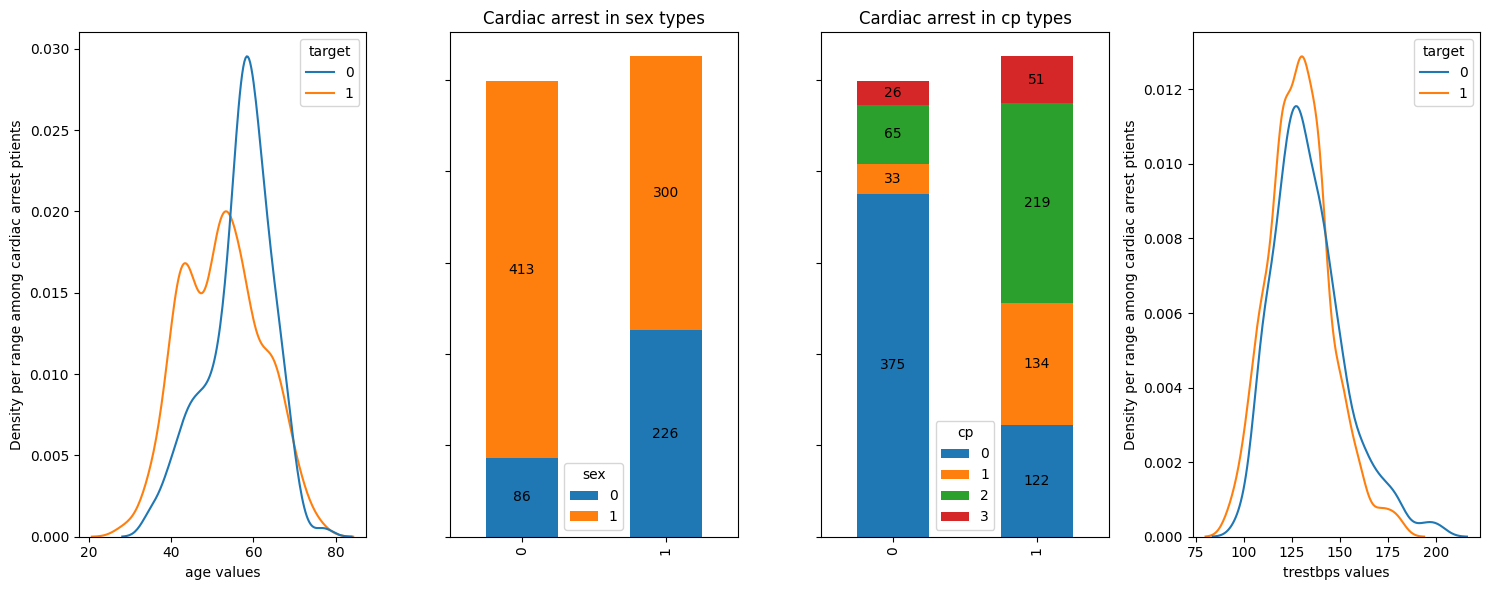

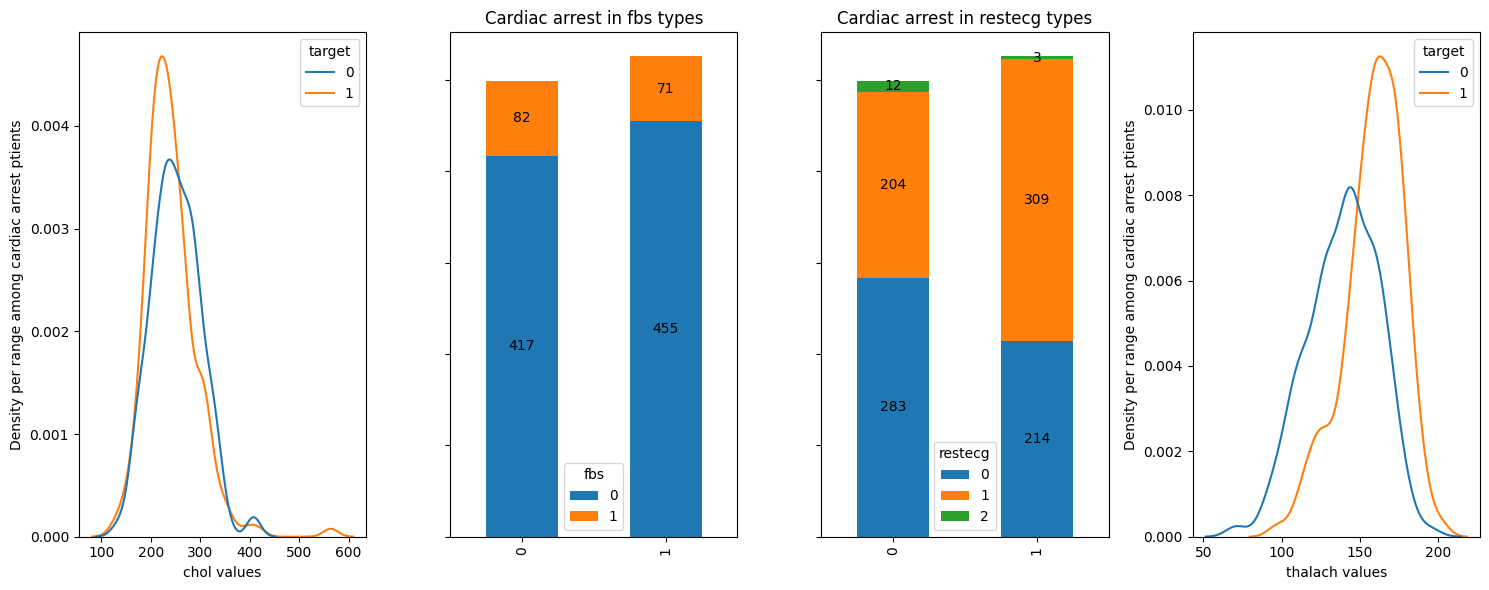

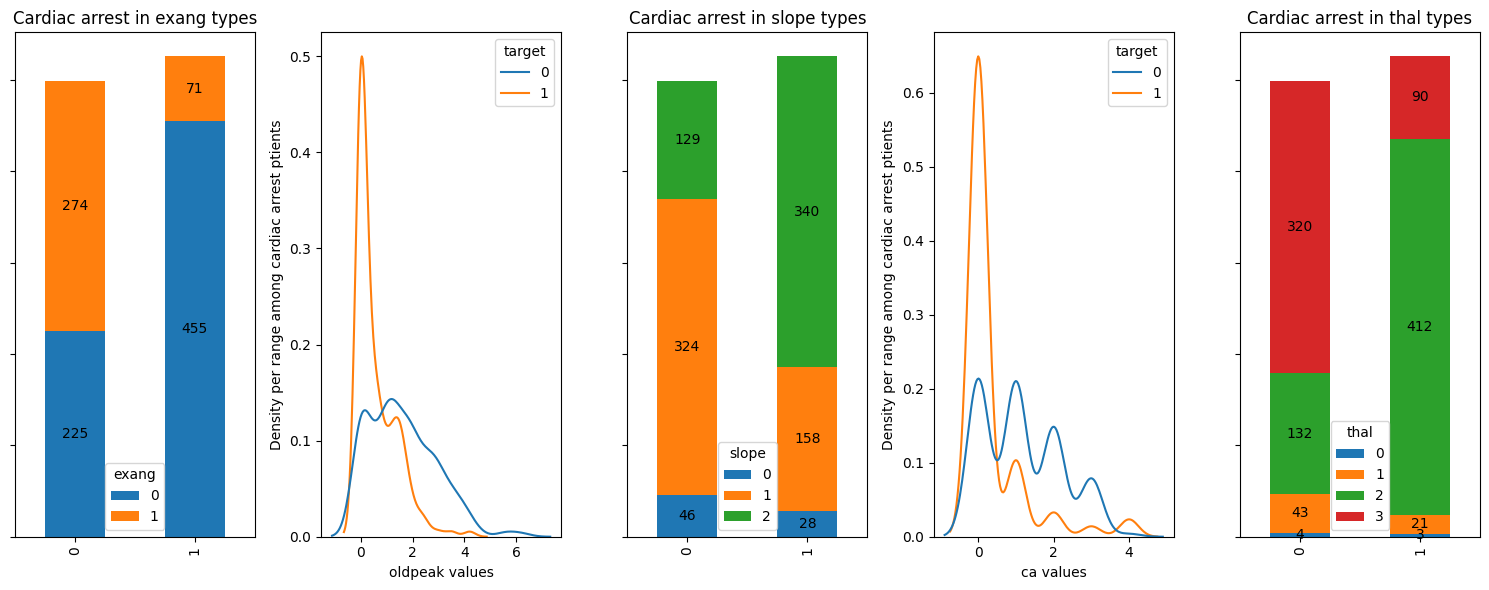

In [4]:
index = 0

grouped = df.groupby(cats[-1])

for j in [4, 4, 5]:
    fig, axes = plt.subplots(ncols=j, figsize=(15, 6))
    for i in range(j):
        if df.columns[index] in cats:
            grouped[df.columns[index]].value_counts().sort_index().unstack().plot(kind="bar", stacked=True, ax=axes[i])
            bar_labels(axes[i], 0, "center")
            axes[i].set_title("Cardiac arrest in {} types".format(df.columns[index].replace('_', ' ')))
        else:
            sns.kdeplot(df, x=df.columns[index], hue=cats[-1], ax=axes[i])
            axes[i].set_xlabel("{} values".format(df.columns[index]))
            axes[i].set_ylabel("Density per range among cardiac arrest ptients")
        index += 1
    plt.tight_layout()
    plt.show()

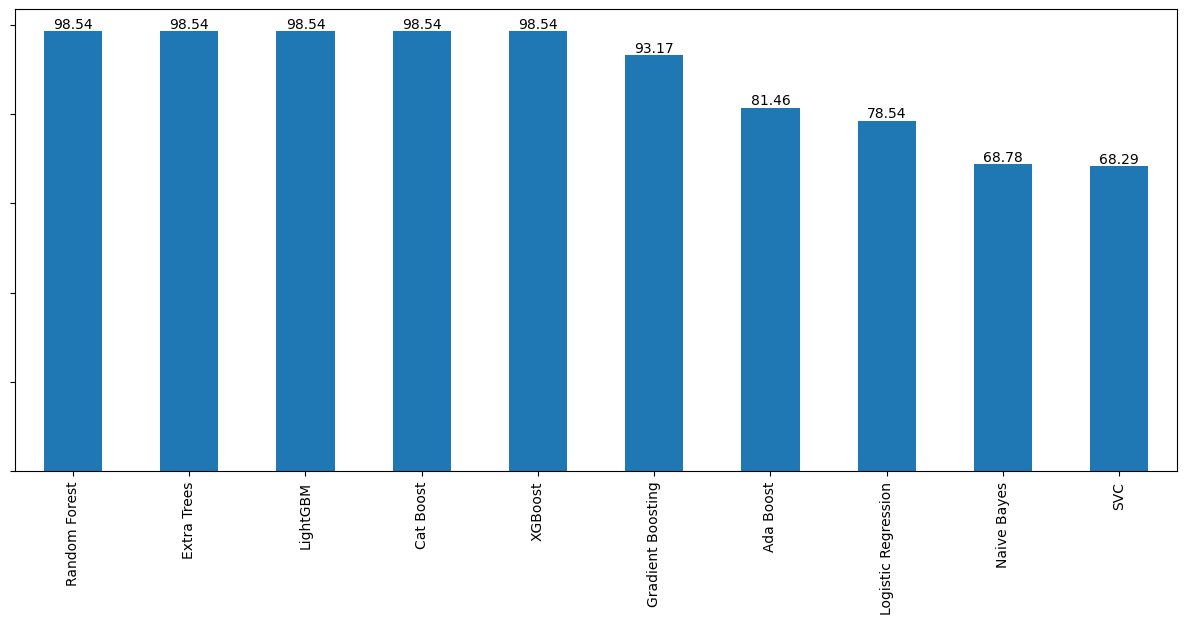

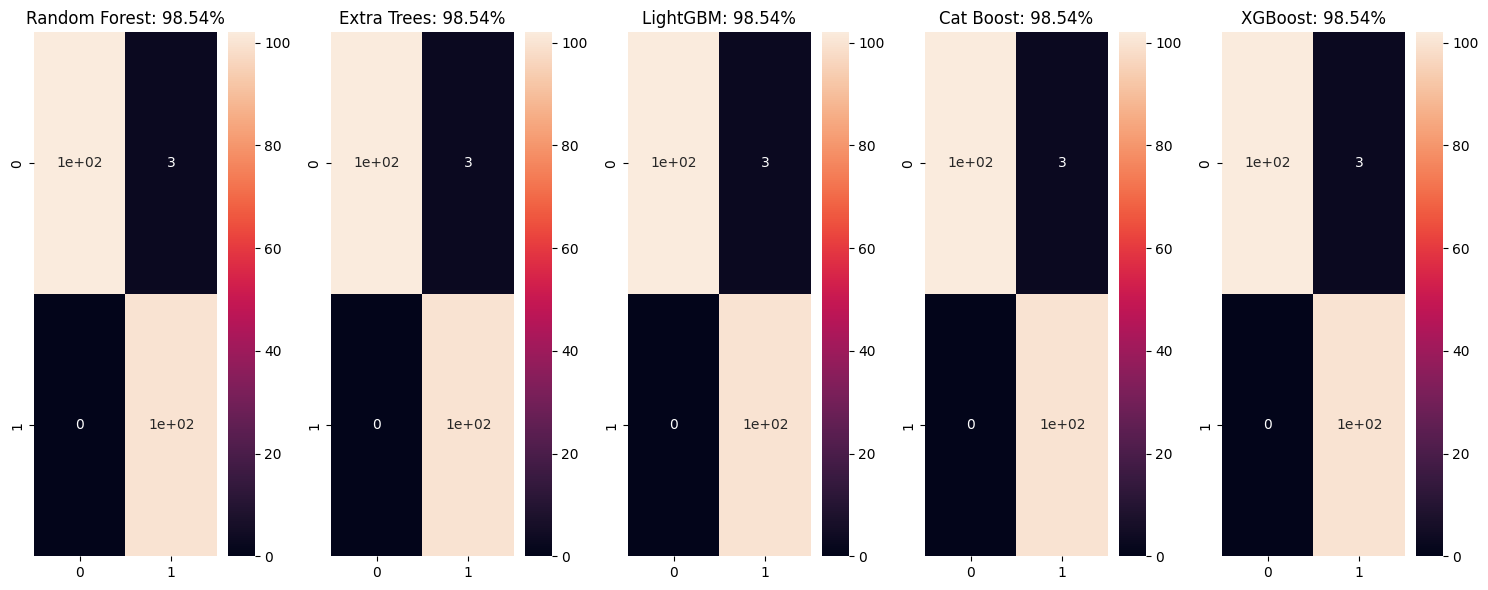

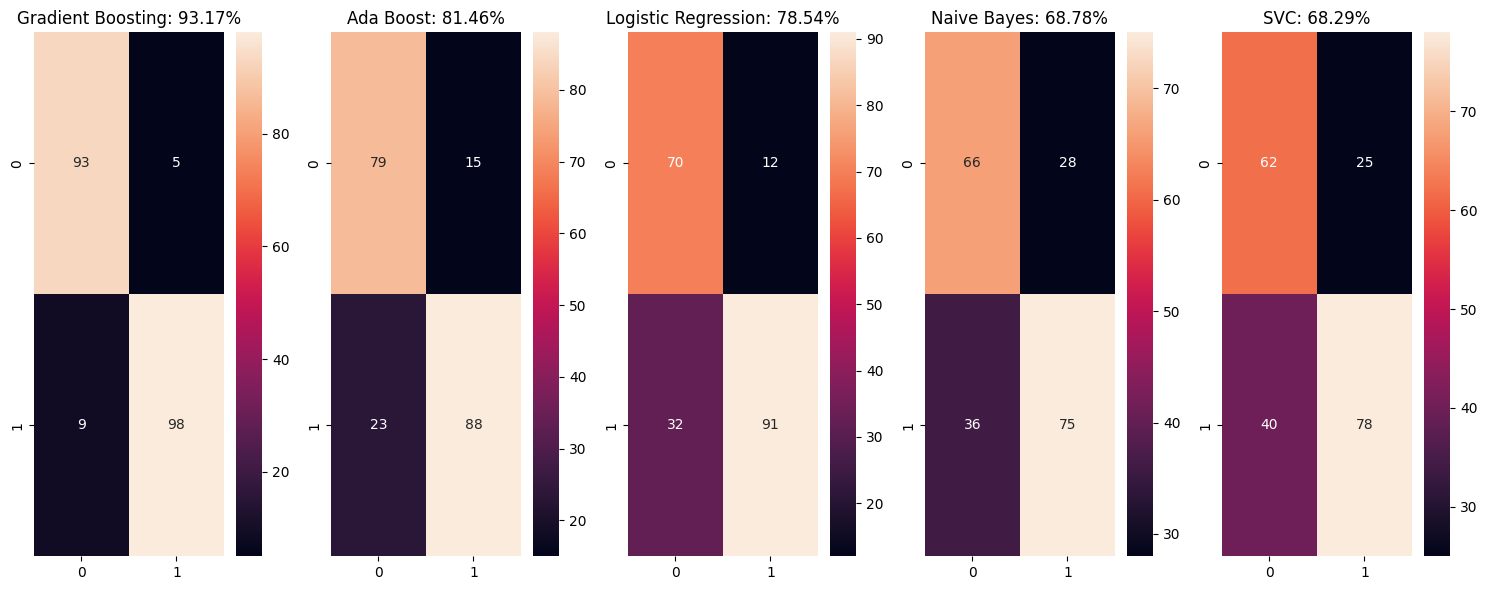

******************************


Random Forest


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

******************************


Extra Trees


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205

******************************


LightGBM


              precision    recall  f1-score   support

           0       1.00      0.97      0.99       105
           1       0.97      1.00      0.99       100

    accuracy                           0.9

In [5]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

training_classification()

           CARDIAC ARREST RISK PREDICTION SYSTEM

Please enter the patient's medical details:
----------------------------------------------------------------------
 1. AGE
   Description: Age of the patient (years)
   Range: 20 - 100 years
   Enter value: 20
----------------------------------------------------------------------
 2. SEX
   Description: Biological sex
   Options:
      0: Female
      1: Male
   Select option (number): 1
----------------------------------------------------------------------
 3. CP
   Description: Chest pain type
   Options:
      0: Typical angina
      1: Atypical angina
      2: Non-anginal pain
      3: Asymptomatic
   Select option (number): 1
----------------------------------------------------------------------
 4. TRESTBPS
   Description: Resting blood pressure
   Range: 80 - 200 mm Hg
   Enter value: 83
----------------------------------------------------------------------
 5. CHOL
   Description: Serum cholesterol level
   Range: 100 - 600 mg/d

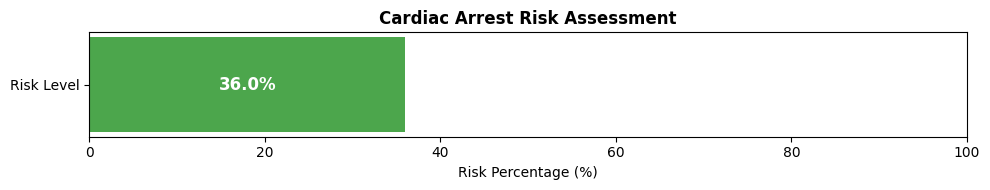


Disclaimer: This is a predictive model for educational purposes.
Always consult healthcare professionals for medical advice.


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Function to display professional input form
def predict_custom_input():
    print("="*60)
    print("           CARDIAC ARREST RISK PREDICTION SYSTEM")
    print("="*60)
    print()

    feature_details = {
        'age': {'type': 'numeric', 'min': 20, 'max': 100, 'desc': 'Age of the patient (years)', 'unit': 'years'},
        'sex': {'type': 'categorical', 'options': {0: 'Female', 1: 'Male'}, 'desc': 'Biological sex'},
        'cp': {'type': 'categorical', 'options': {
            0: 'Typical angina',
            1: 'Atypical angina',
            2: 'Non-anginal pain',
            3: 'Asymptomatic'
        }, 'desc': 'Chest pain type'},
        'trestbps': {'type': 'numeric', 'min': 80, 'max': 200, 'desc': 'Resting blood pressure', 'unit': 'mm Hg'},
        'chol': {'type': 'numeric', 'min': 100, 'max': 600, 'desc': 'Serum cholesterol level', 'unit': 'mg/dl'},
        'fbs': {'type': 'categorical', 'options': {
            0: 'Fasting blood sugar ≤ 120 mg/dl',
            1: 'Fasting blood sugar > 120 mg/dl'
        }, 'desc': 'Fasting blood sugar'},
        'restecg': {'type': 'categorical', 'options': {
            0: 'Normal',
            1: 'ST-T wave abnormality',
            2: 'Left ventricular hypertrophy'
        }, 'desc': 'Resting electrocardiographic results'},
        'thalach': {'type': 'numeric', 'min': 60, 'max': 220, 'desc': 'Maximum heart rate achieved', 'unit': 'bpm'},
        'exang': {'type': 'categorical', 'options': {
            0: 'No exercise-induced angina',
            1: 'Exercise-induced angina present'
        }, 'desc': 'Exercise induced angina'},
        'oldpeak': {'type': 'numeric', 'min': 0, 'max': 6.2, 'desc': 'ST depression induced by exercise', 'unit': ''},
        'slope': {'type': 'categorical', 'options': {
            0: 'Upsloping',
            1: 'Flat',
            2: 'Downsloping'
        }, 'desc': 'Slope of peak exercise ST segment'},
        'ca': {'type': 'numeric', 'min': 0, 'max': 4, 'desc': 'Number of major vessels colored by fluoroscopy', 'unit': ''},
        'thal': {'type': 'categorical', 'options': {
            1: 'Normal blood flow',
            2: 'Fixed defect',
            3: 'Reversible defect',
            4: 'Not described'
        }, 'desc': 'Thalassemia test result'}
    }

    custom_input = []

    print("Please enter the patient's medical details:")
    print("-" * 70)

    for i, feature in enumerate(df.columns[:-1], 1):
        details = feature_details.get(feature, {})

        print(f"{i:2d}. {feature.upper()}")
        print(f"   Description: {details.get('desc', 'No description available')}")

        if details.get('type') == 'numeric':
            unit = details.get('unit', '')
            print(f"   Range: {details.get('min', '?')} - {details.get('max', '?')} {unit}")

            while True:
                try:
                    value = float(input("   Enter value: "))
                    if 'min' in details and 'max' in details:
                        if details['min'] <= value <= details['max']:
                            custom_input.append(value)
                            break
                        else:
                            print(f"   ERROR: Value must be between {details['min']} and {details['max']}")
                    else:
                        custom_input.append(value)
                        break
                except ValueError:
                    print("   ERROR: Please enter a valid number")

        elif details.get('type') == 'categorical':
            options = details.get('options', {})
            print("   Options:")
            for key, desc in options.items():
                print(f"      {key}: {desc}")

            while True:
                try:
                    value = int(input("   Select option (number): "))
                    if value in options:
                        custom_input.append(value)
                        break
                    else:
                        print(f"   ERROR: Please select from {list(options.keys())}")
                except ValueError:
                    print("   ERROR: Please enter a valid number")

        print("-" * 70)

    # Convert to numpy array for prediction
    custom_input_array = np.array(custom_input).reshape(1, -1)

    # Train model and predict
    model = RandomForestClassifier(random_state=42)
    model.fit(x_train, y_train)

    prediction = model.predict(custom_input_array)
    prediction_proba = model.predict_proba(custom_input_array)

    # Display results in a professional way
    print("\n" + "="*60)
    print("           PREDICTION RESULTS")
    print("="*60)
    print()

    risk_score = prediction_proba[0][1] * 100
    confidence = prediction_proba[0][prediction[0]] * 100

    if prediction[0] == 1:
        print("HIGH RISK ALERT")
        print("   Prediction: CARDIAC ARREST RISK DETECTED")
        print(f"   Risk Score: {risk_score:.1f}%")
        print(f"   Confidence: {confidence:.1f}%")
        print("   Immediate medical consultation recommended!")
    else:
        print("LOW RISK ASSESSMENT")
        print("   Prediction: NO SIGNIFICANT CARDIAC ARREST RISK")
        print(f"   Risk Score: {risk_score:.1f}%")
        print(f"   Confidence: {confidence:.1f}%")
        print("   Continue maintaining heart-healthy lifestyle!")

    print("\nProbability Breakdown:")
    print(f"   Probability of cardiac arrest: {prediction_proba[0][1]*100:.2f}%")
    print(f"   Probability of no cardiac arrest: {prediction_proba[0][0]*100:.2f}%")

    # Visual representation
    fig, ax = plt.subplots(figsize=(10, 2))
    ax.barh(['Risk Level'], [risk_score], color='red' if risk_score > 50 else 'green', alpha=0.7)
    ax.set_xlim(0, 100)
    ax.set_xlabel('Risk Percentage (%)')
    ax.set_title('Cardiac Arrest Risk Assessment', fontweight='bold')
    ax.text(risk_score/2, 0, f'{risk_score:.1f}%', ha='center', va='center',
            color='white', fontweight='bold', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nDisclaimer: This is a predictive model for educational purposes.")
    print("Always consult healthcare professionals for medical advice.")

    return custom_input_array, prediction, prediction_proba

# Run the prediction system
custom_input, prediction, probabilities = predict_custom_input()